In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [14]:
df = pd.read_csv('Real estate.csv')
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [15]:
df.drop('No' , axis=1 , inplace= True)

In [16]:
df.head(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [17]:
df.columns = ['TransactionDate', 'HouseAge', 'DistanceTooMRT', 'NumberOfStores', 'Latitude', 'Longitude', 'HousePricePerUnit']
df.head(1)

,TransactionDate,HouseAge,DistanceTooMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9


In [18]:
'''
DOG
Attributes:
4 limbs
1 tail
2 eyes
Methods:
bark()
eat(meat)
run()
'''

'\nDOG\nAttributes:\n4 limbs\n1 tail\n2 eyes\nMethods:\nbark()\neat(meat)\nrun()\n'

In [19]:
df['TransactionDate']

0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: TransactionDate, Length: 414, dtype: float64

In [20]:
df['TransactionMonth'] = df['TransactionDate'].astype(str).str.split('.').str[1].astype(int)

In [21]:
df.head()

,TransactionDate,HouseAge,DistanceTooMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,833


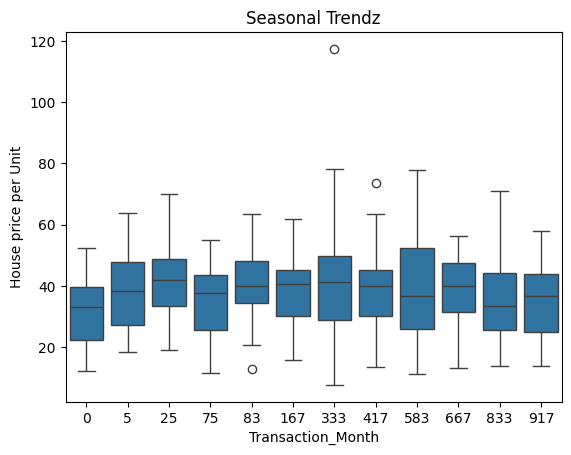

In [22]:
sns.boxplot(x='TransactionMonth' , y='HousePricePerUnit' ,data=df)
plt.title('Seasonal Trendz')
plt.xlabel('Transaction_Month')
plt.ylabel('House price per Unit')
plt.show()

In [23]:
monthly_average = df.groupby('TransactionMonth')['HousePricePerUnit'].mean()
print(monthly_average)

TransactionMonth
0      31.057143
5      38.119149
25     41.293750
75     35.581481
83     40.493478
167    38.304000
333    41.562069
417    38.453448
583    39.604348
667    38.543333
833    35.683871
917    35.557895
Name: HousePricePerUnit, dtype: float64


In [42]:
def convert_fractional_year_to_date(fractional_year):
    year = int(fractional_year)
    rem = fractional_year - year
    base = datetime.datetime(year , 1 , 1)
    result_date = base + datetime.timedelta(days = rem * 365)
    return result_date
df['T_date_time'] = df['TransactionDate'].apply(convert_fractional_year_to_date)
df['T_month_name'] = df['T_date_time'].dt.strftime('%B')
df.head()



,TransactionDate,HouseAge,DistanceTooMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth,T_date_time,T_month_name
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,917,2012-11-30 16:55:11.999997,November
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,917,2012-11-30 16:55:11.999997,November
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,583,2013-08-01 19:04:48.000003,August
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5,2013-07-02 12:00:00.000000,July
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,833,2012-10-31 01:04:48.000003,October
